In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [3]:

len = np.genfromtxt('len_list.csv', delimiter=',')
param = np.genfromtxt('params_abc.csv', delimiter=',')

# Read Data
len = len[:, 0] 

param_a = param[:, 0] 
param_b = param[:, 1] 
param_c = param[:, 2] 

# print list

print("avg_len_list (mm):", len)
print("a:", param_a)
print("b", param_b)
print("c", param_c)

avg_len_list (mm): [15.43448106 14.05288723 14.63108931 15.02400446 15.43823753 15.81217764
 14.90799536 12.20362603 12.60065767 14.16231772]
a: [3.92347702 0.74085954 1.36617081 1.55589028 1.31055676 3.27337223
 1.70713936 4.2623946  4.32632137 0.70837351]
b [0.00852315 0.01331367 0.01478235 0.00938994 0.12992995 0.02075649
 0.02570877 0.00055723 0.00149947 0.01446937]
c [ 2.63118667  1.46164767  1.07620479  0.48164902  0.76712949  0.66943605
  0.90796744 -1.48724183 -0.97155904  3.83904059]


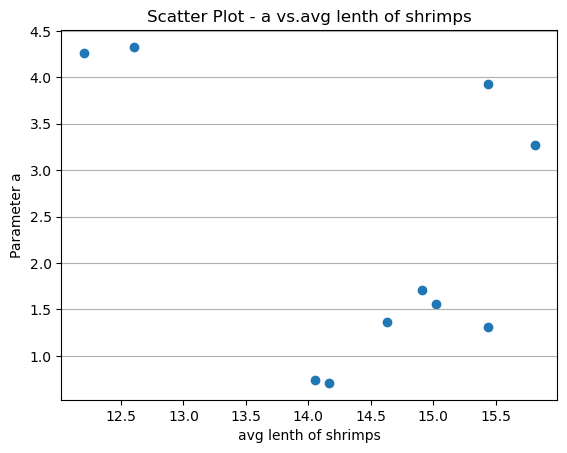

In [7]:
x1 = np.array(len)  
y1 = np.array(param_a)  

plt.scatter(x1, y1)

plt.title("Scatter Plot - a vs.avg lenth of shrimps")
plt.xlabel("avg lenth of shrimps")
plt.ylabel("Parameter a")
plt.grid(axis='y')

plt.show()


In [5]:
covariance = np.cov(x1, y1)[0, 1]

print("Covariance a:", covariance)


Covariance a: -0.6662123022070294


coefficient of determination R-squared : 0.14278402184124483
intercept: 8.933402870707788
slope: [-0.45858898]


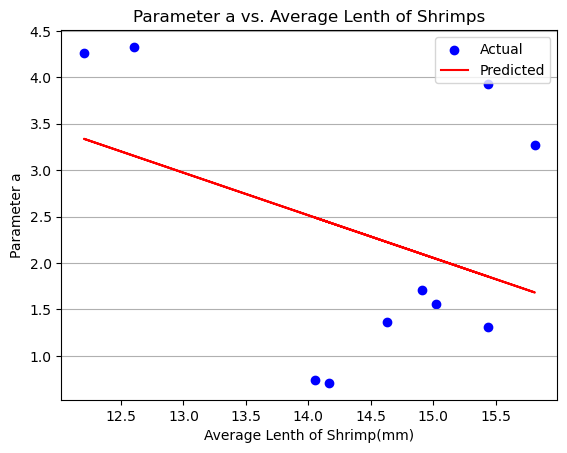

In [6]:
# Create a model and fit it

x1 = x1.reshape((-1, 1))
y1 = y1

model = LinearRegression().fit(x1, y1)

# Get results
r_sq = model.score(x1, y1)

print(f"coefficient of determination R-squared : {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

y1_pred = model.predict(x1)

# Plot the data points and the linear regression line
plt.scatter(x1, y1, color='blue', label='Actual')
plt.plot(x1, y1_pred, color='red', label='Predicted')
plt.xlabel('Average Lenth of Shrimp(mm)')
plt.ylabel('Parameter a')
plt.title('Parameter a vs. Average Lenth of Shrimps')
plt.grid(axis='y')
plt.legend()
plt.show()

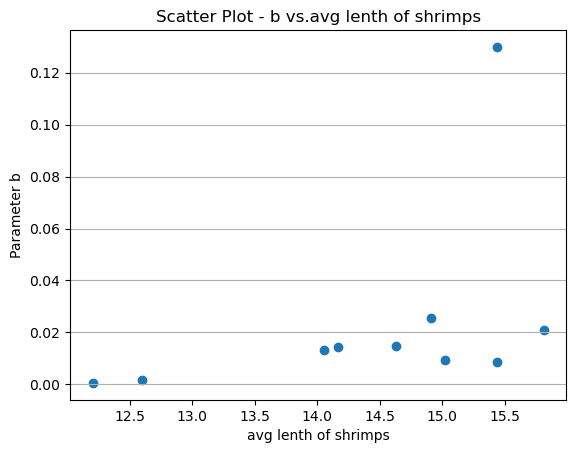

In [12]:

x2 = np.array(len)  
y2 = np.array(param_b)  

plt.scatter(x2, y2)

plt.title("Scatter Plot - b vs.avg lenth of shrimps")
plt.xlabel("avg lenth of shrimps")
plt.ylabel("Parameter b")
plt.grid(axis='y')

plt.show()


In [222]:
covariance = np.cov(x2, y2)[0, 1]

print("Covariance b:", covariance)


Covariance b: 0.01966546790314713


coefficient of determination: 0.183826303326992
intercept: -0.1713986109342176
slope: [0.01353678]


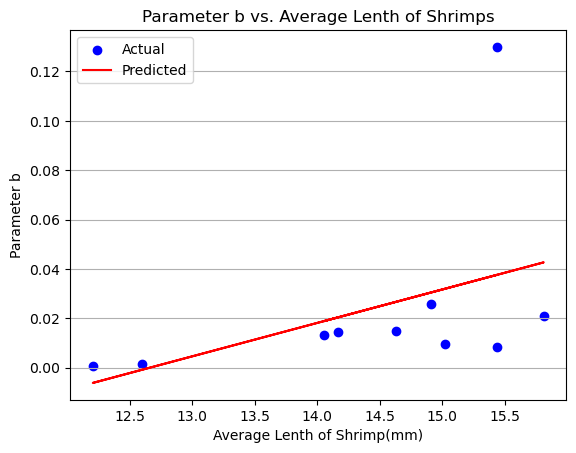

In [11]:
# Create a model and fit it

x2 = x2.reshape((-1, 1))
y2 = y2

model = LinearRegression().fit(x2, y2)

# Get results
r_sq = model.score(x2, y2)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

y2_pred = model.predict(x2)

# Plot the data points and the linear regression line
plt.scatter(x2, y2, color='blue', label='Actual')
plt.plot(x2, y2_pred, color='red', label='Predicted')
plt.xlabel('Average Lenth of Shrimp(mm)')
plt.ylabel('Parameter b')
plt.title('Parameter b vs. Average Lenth of Shrimps')
plt.grid(axis='y')
plt.legend()
plt.show()

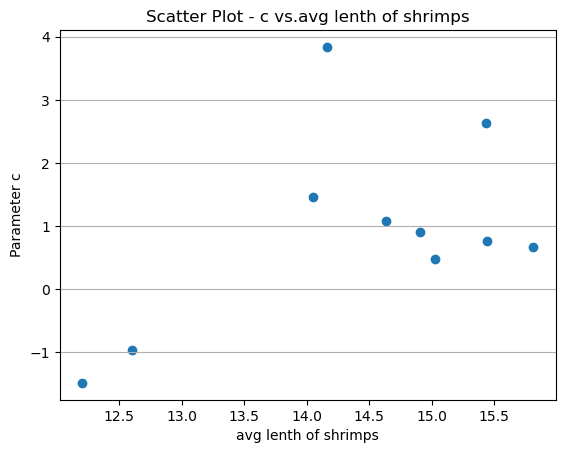

In [16]:
x3 = np.array(len)  
y3 = np.array(param_c)  

plt.scatter(x3, y3)

plt.title("Scatter Plot - c vs.avg lenth of shrimps")
plt.xlabel("avg lenth of shrimps")
plt.ylabel("Parameter c")
plt.grid(axis='y')

plt.show()

In [225]:
covariance = np.cov(x3, y3)[0, 1]

print("Covariance b:", covariance)


Covariance b: 0.9798156316826095


coefficient of determination: 0.2777319099568706
intercept: -8.792698438620459
slope: [0.67445865]


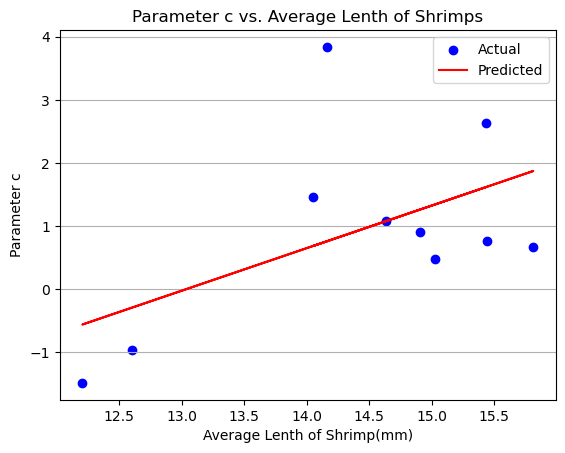

In [226]:
# Create a model and fit it

x3 = x3.reshape((-1, 1))
y3 = y3

model = LinearRegression().fit(x3, y3)

# Get results
r_sq = model.score(x3, y3)
print(f"coefficient of determination: {r_sq}")

print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

y3_pred = model.predict(x2)

# Plot the data points and the linear regression line
plt.scatter(x3, y3, color='blue', label='Actual')
plt.plot(x3, y3_pred, color='red', label='Predicted')
plt.xlabel('Average Lenth of Shrimp(mm)')
plt.ylabel('Parameter c')
plt.title('Parameter c vs. Average Lenth of Shrimps')
plt.grid(axis='y')
plt.legend()
plt.show()

coefficient of determination: 0.6130206089166068
intercept: -19.89723433928901
slope: [1.4545377]


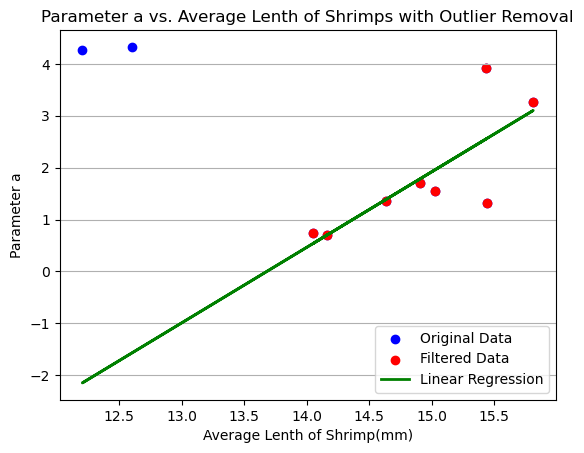

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.covariance import EllipticEnvelope
import statsmodels.api as sm

# sample data

X = x1.reshape((-1, 1))
y = y1

# Perform linear regression
reg = LinearRegression()

# Remove outliers using EllipticEnvelope
outlier_detector = EllipticEnvelope(contamination=0.2)
outlier_detector.fit(X)
outliers = outlier_detector.predict(X) == -1
X_filtered = X[~outliers]
y_filtered = y[~outliers]
reg.fit(X_filtered, y_filtered)


# Get results
r_sq = reg.score(X_filtered, y_filtered)

print(f"coefficient of determination: {r_sq}")

print(f"intercept: {reg.intercept_}")

print(f"slope: {reg.coef_}")

# Plot original and filtered data
plt.scatter(X, y, color='blue', label='Original Data')
plt.scatter(X_filtered, y_filtered, color='red', label='Filtered Data')
plt.plot(X, reg.predict(X), color='green', linewidth=2, label='Linear Regression')
plt.xlabel('Average Lenth of Shrimp(mm)')
plt.ylabel('Parameter a')
plt.title('Parameter a vs. Average Lenth of Shrimps with Outlier Removal')
plt.grid(axis='y')
plt.legend()
plt.show()


In [228]:
X_filtered.reshape((1, -1))

array([[15.43448106, 14.05288723, 14.63108931, 15.02400446, 15.43823753,
        15.81217764, 14.90799536, 14.16231772]])

In [229]:
y_filtered

array([3.92347702, 0.74085954, 1.36617081, 1.55589028, 1.31055676,
       3.27337223, 1.70713936, 0.70837351])

In [230]:
covariance = np.cov(X_filtered.reshape((1, -1)), y_filtered)[0, 1]

print("Covariance a Fixed:", covariance)

Covariance a Fixed: 0.5710739903581777


In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Sample data
x = X_filtered
y = y_filtered

# Reshape the data to 2D arrays
X = x.reshape(-1, 1)

# Perform linear regression
regression = LinearRegression()
regression.fit(X, y)

# Add a constant column to the input features for statsmodels
X = sm.add_constant(X)

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X)
results = model.fit()

# Get the p-values for the coefficients
p_values = results.pvalues

# Print the results
print("Coefficients:", regression.coef_)
print("Intercept:", regression.intercept_)
print("P-values:", p_values)


Coefficients: [1.4545377]
Intercept: -19.89723433928901
P-values: [0.03027402 0.02158091]
